# 네이버 영화 리뷰 과제

# 0. Import

In [ ]:
# 폰트 설치용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
import matplotlib
get_ipython().run_line_magic('config',"InlineBackend.figure_format='retina' #화질 좋게해주기")
# 이후에 런타임 다시 시작을 해주시면 폰트가 나옵니다!

# 1. Web Crawling

In [ ]:
!pip install bs4 # 파이썬 크롤링 크롤러 설치
!pip install lxml # Beautiful Soup 파싱 도구를 더 잘 활용하기 위한 것

In [ ]:
from bs4 import BeautifulSoup
import os
import re
import requests
import sys
import pandas as pd
from pprint import pprint

In [ ]:
# 네이버 영화 리뷰 페이지 주소

url0 = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code='
url1='&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page='


# 영화 코드
movie_num=184318 # 영화 블랙위도우

# 네이버 영화 리뷰 페이지 주소(전체)
url2=url0 +str(movie_num)+url1
print(url2)

https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=184318&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=


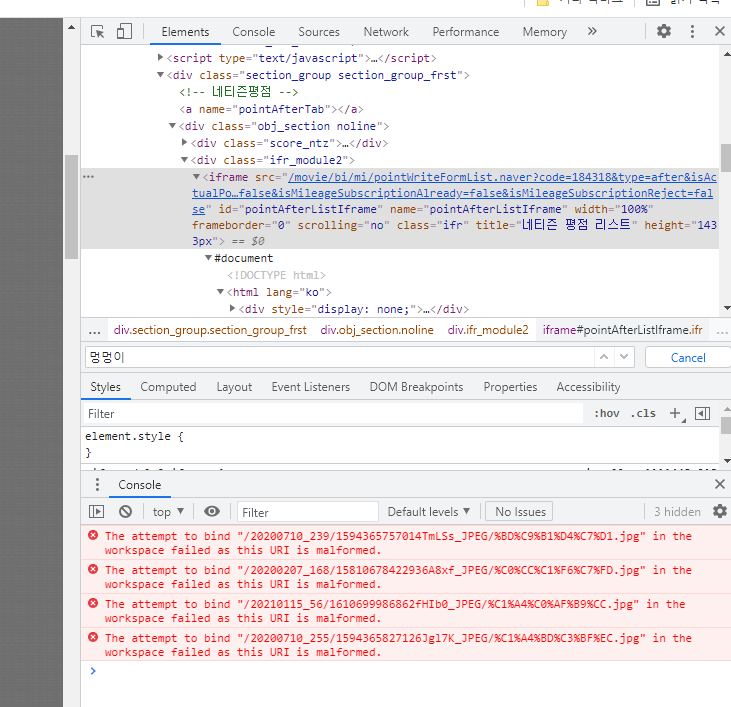

In [ ]:

r0=requests.get(url2)
html0=r0.text
# parser : "lxml"
page0=BeautifulSoup(html0,'lxml')


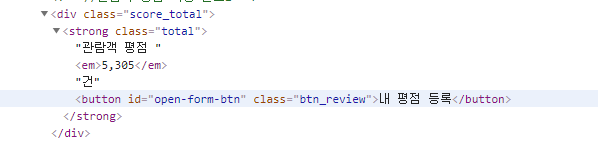

In [ ]:

#(시간 오래걸림) 전체 리뷰를 모두 가져오고 싶을 때!
# 전체 리뷰 개수
total_num=page0.select('div[class=score_total] strong[class=total] em')
print('select total_num :',total_num)
print('text total_num :',total_num[0].text)
total_num=total_num[0].text
print('text total_num1 :',total_num)
total_num=total_num.replace(',','')
print('text total_num2 :',total_num)
total_num=int(total_num)


# 전체 리뷰 페이지 개수 (한 페이지에 리뷰 10개 존재)
total_page=total_num//10 +1
print('total_page :',total_page)

select total_num : [<em>5,310</em>]
text total_num : 5,310
text total_num1 : 5,310
text total_num2 : 5310
total_page : 532


In [ ]:
# 리뷰 페이지 개수 설정
total_page=100


# 영화 리뷰 데이터셋 생성
movie_review=pd.DataFrame(columns=['score','review'])

# 각 리뷰 페이지에 대해 반복문 실행
for i in range(1,total_page+1):
  url= url2+str(i)
  r=requests.get(url)
  html=r.text
  page=BeautifulSoup(html,'lxml')

  # 평점 (1~10 점)
  score=page.select('div[class=star_score] em')
  score=[int(i.text) for i in score]

  # 감상평
  review=[]
  for j in range(len(score)):
    map='div[class=score_reple] span[id=_filtered_ment_'+str(j)+']'
    review1=page.select(map)
    review1=review1[0].text.strip()
    review.append(review1)

  # 평점과 감상평을 dataFrame에 저장.
  for j in range(len(score)):
    new_data={'score':score[j], 'review':review[j]}
    movie_review=movie_review.append(new_data,ignore_index=True)


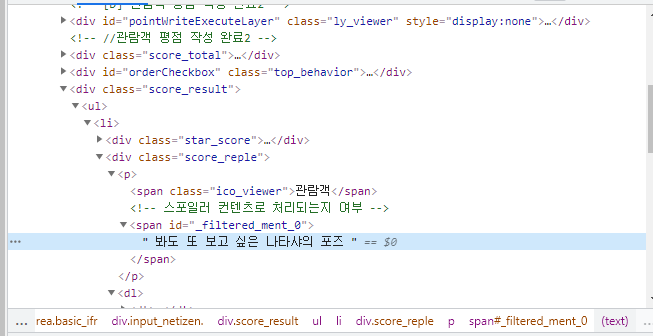

In [ ]:
movie_review[:10]

,score,review
0,10,스칼렛 요한슨 고생했어요
1,10,항상 마블 영화에서 위도우 씬이 편집 삭제됐었는데 이 기회에 블랙위도우 서사를 마무...
2,10,은근히 다크한 분위기인데 그만큼 진지한 스토리라서 몰입해서 봄. 어린시절 훈련내용은...
3,10,역시 역시 마블입니다. 마블은 절대 배신하지 않음. 오늘 특수관 예매를 못해서 일...
4,10,마블 영화 얼마만이냐ㅜㅜㅜ 액션 폭발하고 극장에서 보니깐 확실히 재밌다!! 또 보러갈래ㅜ
5,8,블랙위도우의 과거얘기가 많을줄 알았는데그건 아니었음그치만 나쁘지않게 봄기대 많이하면...
6,10,아 진짜 너무 재밌다 블위 조올라게 사랑해
7,10,나타샤 연기력 좋고 볼만했음
8,6,"초반 30분까진 굉장히 재미있는데, 레드룸 도착 이후 스토리 진행이 급해지고, 빌런..."
9,10,오마이갓 오마이가앗..


In [ ]:
print('총 리뷰의 수 :',len(movie_review))

총 리뷰의 수 : 1000


# 2. Data Preprocessing

In [ ]:
!pip install konlpy

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


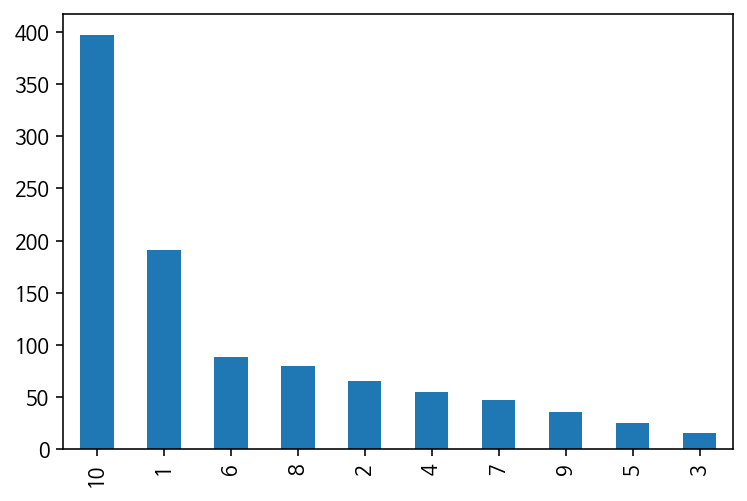

In [ ]:
# 데이터 분포 확인
movie_review['score'].value_counts().plot(kind='bar')

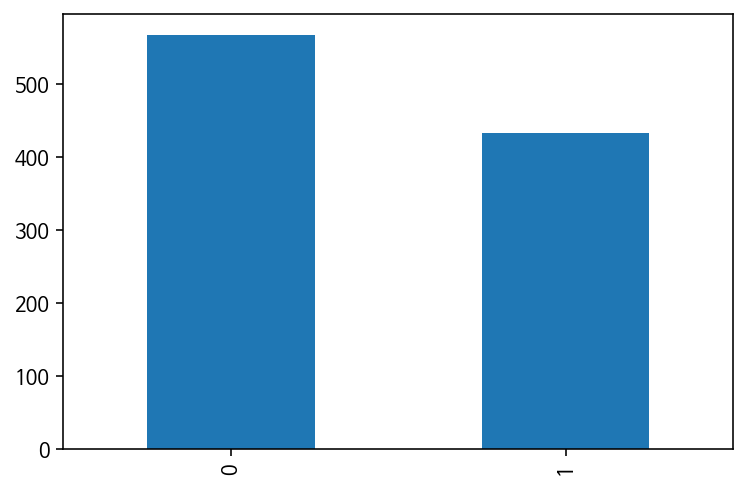

In [ ]:
# 평점이 8 초과인 경우 1, 8 이하인 경우 0으로 labeling
movie_review['score']=movie_review['score'].astype('int')
movie_review['label']=np.select([movie_review.score>8],[1],default=0)
movie_review['label'].value_counts().plot(kind='bar')

In [ ]:
# 각 열에 대해서 중복을 제외한 샘플의 수 카운트
movie_review['score'].nunique(),movie_review['review'].nunique(),movie_review['label'].nunique()


(10, 967, 2)

In [ ]:
# review 열 중복 제거
movie_review.drop_duplicates(subset=['review'],inplace=True)
print('총 샘플의 수 :',len(movie_review))


총 샘플의 수 : 967


In [ ]:
# NA 값 있는지 확인
print(movie_review.isnull().values.any())

False


## 불순어 제거 및 텍스트 데이터 전처리

In [ ]:
movie_review.head()

,score,review,label
0,10,스칼렛 요한슨 고생했어요,1
1,10,항상 마블 영화에서 위도우 씬이 편집 삭제됐었는데 이 기회에 블랙위도우 서사를 마무...,1
2,10,은근히 다크한 분위기인데 그만큼 진지한 스토리라서 몰입해서 봄. 어린시절 훈련내용은...,1
3,10,역시 역시 마블입니다. 마블은 절대 배신하지 않음. 오늘 특수관 예매를 못해서 일...,1
4,10,마블 영화 얼마만이냐ㅜㅜㅜ 액션 폭발하고 극장에서 보니깐 확실히 재밌다!! 또 보러갈래ㅜ,1


In [ ]:
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer

# 불용어 설정

stopwords=['않다','에서','있다','없다','그렇다','아니다','것','이다','의','가','이','은','들', '주',
             '는','좀','잘','걍','과','도','을','를','으로','자','에','와','한','하다','휴','수' ,'일']

df=movie_review

# 불순어 제거
df['text'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글 제외 불순어 제거
df['text'].replace('',np.nan,inplace=True)

# 결측치로 변한 행 제거
df=df.dropna()

# 3. Word Cloud 생성

In [ ]:
### 토크나이징 후 명사만 추출

In [ ]:
#konlpy로 명사만 추출하는 토큰화를 진행
okt=Okt()
token=[]
for sentence in df['text']:
  temp_X=[]
  temp_X=okt.nouns(sentence) # 명사 토큰화
  temp_X=[word for word in temp_X if not word in stopwords] # 불용어 제거 
  token.append(temp_X)
df['token']=token
tokenizer=Tokenizer()
tokenizer.fit_on_texts(token)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
from collections import Counter 

# 단어 빈도 수 세어서 가장 빈도 높은 300개만 추출하는 함수 정의
def tokenizing(df):
    words = np.hstack(df['token'].values)
    word_count = Counter(words)
    input = dict(word_count.most_common(300))
    return input

In [ ]:
from wordcloud import WordCloud

# 토크나이징된 data frame 넣으면 워드클라우드 그려주는 함수 정의
def wcdraw(df, color):  
  df2 = tokenizing(df)
  fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
  wordcloud = WordCloud(font_path = fontpath, max_words=100, colormap = color,
                      width=900,height=500, background_color ='white')
  wordcloud = wordcloud.generate_from_frequencies(df2) #빈도에 따라서 
  plt.figure(figsize = (15 , 10))
  plt.axis("off")
  plt.imshow(wordcloud)

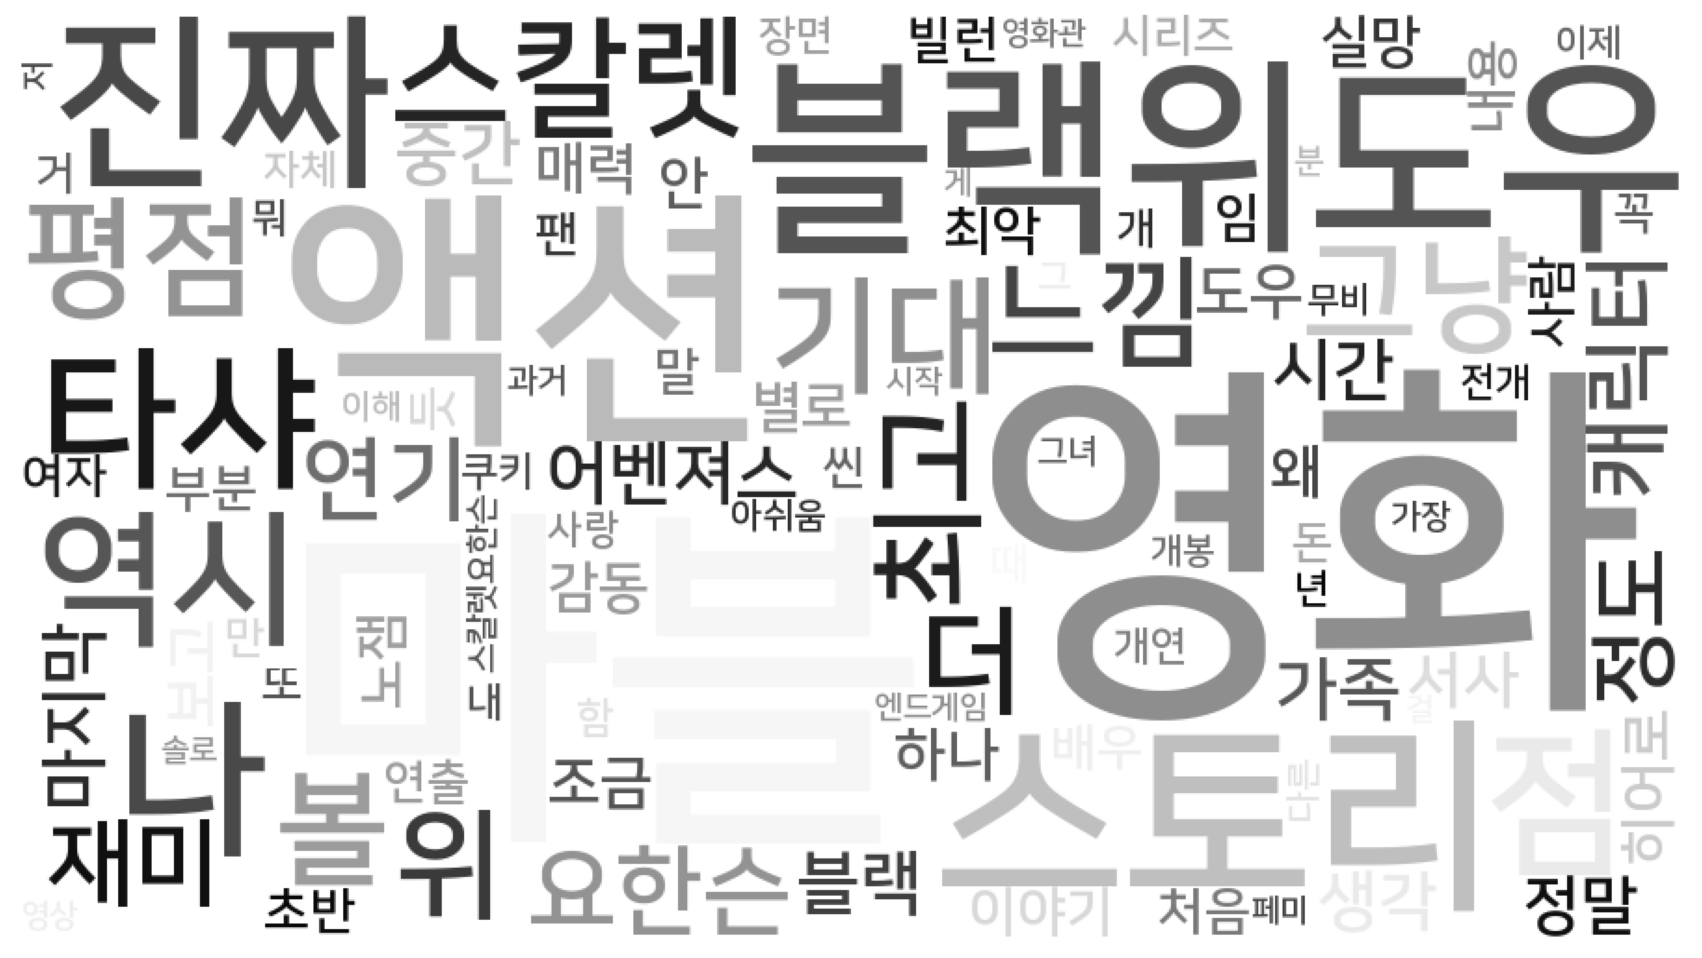

In [ ]:
wcdraw(df, 'binary')